In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Results from the paper

In [2]:
GRU = {
    'mort_hosp':{'auc': 0.8504, 'auprc': 0.5215, 'F1': 0.4229},
    'mort_icu': {'auc': 0.8632, 'auprc': 0.4651, 'F1': 0.3630},
    'los_3':    {'auc': 0.6740, 'auprc': 0.6017, 'F1': 0.5336},
    'los_7':    {'auc': 0.7054, 'auprc': 0.1625, 'F1': 0.0233},
}

# Averaged Multimodal

word2vec_avg = {
    'mort_hosp':{'auc': 0.8642, 'auprc': 0.5422, 'F1': 0.4542},
    'mort_icu': {'auc': 0.8717, 'auprc': 0.4847, 'F1': 0.4230},
    'los_3':    {'auc': 0.6863, 'auprc': 0.6181, 'F1': 0.5419},
    'los_7':    {'auc': 0.7159, 'auprc': 0.1791, 'F1': 0.0135},
}

fastText_avg = {
    'mort_hosp':{'auc': 0.8609, 'auprc': 0.5447, 'F1': 0.4550},
    'mort_icu': {'auc': 0.8714, 'auprc': 0.4836, 'F1': 0.4291},
    'los_3':    {'auc': 0.6855, 'auprc': 0.6159, 'F1': 0.5446},
    'los_7':    {'auc': 0.7131, 'auprc': 0.1757, 'F1': 0.0102},
}

concat_avg = {
    'mort_hosp':{'auc': 0.8598, 'auprc': 0.5419, 'F1': 0.4566},
    'mort_icu': {'auc': 0.8690, 'auprc': 0.4828, 'F1': 0.4076},
    'los_3':    {'auc': 0.6861, 'auprc': 0.6169, 'F1': 0.5470},
    'los_7':    {'auc': 0.7159, 'auprc': 0.1767, 'F1': 0.0137},
}


# Proposed Model

word2vec_proposed = {
    'mort_hosp':{'auc': 0.8755, 'auprc': 0.5587, 'F1': 0.4723},
    'mort_icu': {'auc': 0.8835, 'auprc': 0.4923, 'F1': 0.4302},
    'los_3':    {'auc': 0.6954, 'auprc': 0.6268, 'F1': 0.5504},
    'los_7':    {'auc': 0.7255, 'auprc': 0.1878, 'F1': 0.0158},
}

fastText_proposed = {
    'mort_hosp':{'auc': 0.8715, 'auprc': 0.5568, 'F1': 0.4687},
    'mort_icu': {'auc': 0.8785, 'auprc': 0.4878, 'F1': 0.4309},
    'los_3':    {'auc': 0.6961, 'auprc': 0.6255, 'F1': 0.5587},
    'los_7':    {'auc': 0.7181, 'auprc': 0.1801, 'F1': 0.0108},
}

concat_proposed = {
    'mort_hosp':{'auc': 0.8698, 'auprc': 0.5535, 'F1': 0.4638},
    'mort_icu': {'auc': 0.8766, 'auprc': 0.4874, 'F1': 0.4224},
    'los_3':    {'auc': 0.6993, 'auprc': 0.6277, 'F1': 0.5582},
    'los_7':    {'auc': 0.7192, 'auprc': 0.1825, 'F1': 0.0138},
}


Place them into pandas df to be used later

In [3]:
# paper_results_07
paper_results_07 = pd.DataFrame.from_dict(GRU, orient='index')
paper_results_07 = paper_results_07.reset_index()
paper_results_07.rename(columns={'index':'task'}, inplace=True)
paper_results_07['layer'] = 'GRU'

# paper_results_08
word2vec_avg_pd = pd.DataFrame.from_dict(word2vec_avg, orient='index')
word2vec_avg_pd = word2vec_avg_pd.reset_index()
word2vec_avg_pd.rename(columns={'index':'task'}, inplace=True)
word2vec_avg_pd['embedding'] = 'word2vec'

fastText_avg_pd = pd.DataFrame.from_dict(fastText_avg, orient='index')
fastText_avg_pd = fastText_avg_pd.reset_index()
fastText_avg_pd.rename(columns={'index':'task'}, inplace=True)
fastText_avg_pd['embedding'] = 'fasttext'

concat_avg = pd.DataFrame.from_dict(word2vec_avg, orient='index')
concat_avg = concat_avg.reset_index()
concat_avg.rename(columns={'index':'task'}, inplace=True)
concat_avg['embedding'] = 'concat'

paper_results_08 = pd.concat([word2vec_avg_pd, fastText_avg_pd, concat_avg])

# paper_results_09
word2vec_proposed_pd = pd.DataFrame.from_dict(word2vec_proposed, orient='index')
word2vec_proposed_pd = word2vec_proposed_pd.reset_index()
word2vec_proposed_pd.rename(columns={'index':'task'}, inplace=True)
word2vec_proposed_pd['embedding'] = 'word2vec'

fastText_proposed_pd = pd.DataFrame.from_dict(fastText_proposed, orient='index')
fastText_proposed_pd = fastText_proposed_pd.reset_index()
fastText_proposed_pd.rename(columns={'index':'task'}, inplace=True)
fastText_proposed_pd['embedding'] = 'fasttext'

concat_proposed_pd = pd.DataFrame.from_dict(concat_proposed, orient='index')
concat_proposed_pd = concat_proposed_pd.reset_index()
concat_proposed_pd.rename(columns={'index':'task'}, inplace=True)
concat_proposed_pd['embedding'] = 'concat'

paper_results_09 = pd.concat([word2vec_avg_pd, fastText_avg_pd, concat_avg])


## Functions to produce tabular outputs

In [4]:
# Add n blank rows
def add_blank_rows_df(df, after_each_n):
    new_index = pd.RangeIndex(len(df) + np.ceil(len(df)/after_each_n))
    new_df = pd.DataFrame('', index=new_index, columns=df.columns)
    
    ids = []
    jump = 0
    for i in range(0, len(df)):
        ids.append(i + np.floor(i/after_each_n))
        
    new_df.loc[ids] = df.values
    return new_df

def get_results(result_path: str,
                paper_results,
                model_category: str,
                sort_by:str,
                group_by: list,
                exp_naming: list,
                var_type: str,
                show_rankings: bool = True):
    
    result_dists = []
    exps = os.listdir(result_path)
    
    # Pulls the results from the `.p` files 
    for exp in exps:
        if '.p' not in exp:
            continue
        result_dict = pd.read_pickle(os.path.join(result_path, exp))
        result_dict[exp_naming[0]], result_dict[exp_naming[1]], result_dict[exp_naming[2]], result_dict[exp_naming[3]] = exp.split("-")[:4]
        result_dict["model_category"] = model_category
        result_dists.append(result_dict)
        
    result = pd.DataFrame(result_dists)
    result.sort_values(by=['task', sort_by], inplace=True, ascending=False)

    # Generate the summary results table
    summary_results, df_all = get_summary_results(result, 
                                          model_category,
                                          sort_by,
                                          group_by,
                                          exp_naming,
                                          var_type,
                                          show_rankings)
    
    
    results_difference = get_results_difference(result,
                                                paper_results,
                                                model_category,
                                                sort_by,
                                                group_by,
                                                exp_naming,
                                                var_type)
    
    return result, summary_results, results_difference, df_all

def get_summary_results(result, 
                        model_category: str,
                        sort_by:str,
                        group_by: list,
                        exp_naming: list,
                        var_type: str,
                        show_rankings: bool = True):
    
    df = result.groupby(by=group_by).agg({"auc":['mean','std'], 
                                          "auprc":['mean','std'],
                                          "F1":['mean','std'], 
                                          'acc':['mean','std']})
    df.columns = df.columns.map('_'.join).str.strip('_')
    df.reset_index(inplace=True)
    df["model_category"] = model_category
    
    # Get values in terms of %
    for col in ['auc_mean', 'auc_std', 'auprc_mean', 'auprc_std',
       'F1_mean', 'F1_std', 'acc_mean', 'acc_std']:
       df[col] = df[col] * 100
    
    if show_rankings:
        for col in ['auc_mean', 'auprc_mean', 'F1_mean']:
            df[f'{col}_ranking'] = df.groupby('task')[col].rank(method='dense', ascending=False).astype(int).apply(lambda x: f'({x})')
    
    
    
    # Rename the tasks
    task_mapping = {
        "los_3": "LOS > 3 Days",
        "los_7": "LOS > 7 Days",
        "mort_hosp": "In-Hospital Mortality",
        "mort_icu": "In-ICU Mortality"
    }
    for k, v in task_mapping.items():
        df.loc[df["task"] == k, "task"] = v
        
    df_all = df.copy()
    
    # Format the numeric results
    for metric in ["auc", "auprc", "F1", "acc"]:
        df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)
    
    # Order the results in the manner desired
    if show_rankings:
        df = df[["task", "model_category",var_type, "auc", "auc_mean_ranking", "auprc", "auprc_mean_ranking", "F1", "F1_mean_ranking"]]
        df.columns = ["task", "model_category",var_type, "auc", "", "auprc", "", "F1", ""]
    else:
        df = df[["task", "model_category",var_type, "auc", "auprc", "F1"]]
        

    df.sort_values(by=['task', sort_by], inplace=True, ascending=[True, True])

    return df, df_all


def get_results_difference(result, 
                           paper_results,
                           model_category: str,
                           sort_by:str,
                           group_by: list,
                           exp_naming: list,
                           var_type: str):
    
    results_difference = result.groupby(by=group_by).agg({"auc":['mean'], "auprc":['mean'], "F1":['mean']})
    results_difference = results_difference.rename(columns={'mean':''})
    results_difference.columns = results_difference.columns.map('_'.join).str.strip('_')
    results_difference.reset_index(inplace=True)
    results_difference["model_category"] = model_category
    
    # Take the difference between the reported results in the paper and what we have recorded [auc, auprc, F1]
    results_difference = results_difference.assign(auc = results_difference['auc'] - results_difference.merge(paper_results, 
                                                                                         on=['task',var_type], 
                                                                                         suffixes=('','_y'), 
                                                                                         how='left')['auc_y'])  
    results_difference = results_difference.assign(auprc = results_difference['auprc'] - results_difference.merge(paper_results, 
                                                                                         on=['task',var_type], 
                                                                                         suffixes=('','_y'), 
                                                                                         how='left')['auprc_y']) 
    results_difference = results_difference.assign(F1 = results_difference['F1'] - results_difference.merge(paper_results, 
                                                                                         on=['task',var_type], 
                                                                                         suffixes=('','_y'), 
                                                                                         how='left')['F1_y']) 
    # If no data from paper, then set to '-'
    results_difference.loc[results_difference.merge(paper_results, 
                                                     on=['task',var_type], 
                                                     suffixes=('','_y'), 
                                                     how='left')['auc_y'].isnull(), 'auc'] = '-'
    results_difference.loc[results_difference.merge(paper_results, 
                                                     on=['task',var_type], 
                                                     suffixes=('','_y'), 
                                                     how='left')['auprc_y'].isnull(), 'auprc'] = '-'
    results_difference.loc[results_difference.merge(paper_results, 
                                                     on=['task',var_type], 
                                                     suffixes=('','_y'), 
                                                     how='left')['F1_y'].isnull(), 'F1'] = '-'


    # Get values in terms of %
    for col in ['auc', 'auprc', 'F1']:
       results_difference[col] = results_difference[col] * 100
    
    # Rename the tasks
    task_mapping = {
        "los_3": "LOS > 3 Days",
        "los_7": "LOS > 7 Days",
        "mort_hosp": "In-Hospital Mortality",
        "mort_icu": "In-ICU Mortality"
    }
    for k, v in task_mapping.items():
        results_difference.loc[results_difference["task"] == k, "task"] = v
    
    # Format the numeric results
    for metric in ["auc", "auprc", "F1"]:
        results_difference[metric] = results_difference[[metric]].apply(lambda x: "{:.2f}".format(x[0]) if not isinstance(x[0], str) else '-', axis=1)
    
    # Order the results in the manner desired
    results_difference = results_difference[["task", "model_category",var_type, "auc", "auprc", "F1"]]
    
    results_difference.sort_values(by=['task', sort_by], inplace=True, ascending=[True, True])
    
    return results_difference


# Only time-series data results

In [5]:
results_07, summary_results_07, results_difference_07, _ = get_results(
    result_path="results/07-GRU",
    paper_results=paper_results_07,
    model_category="GRU",
    sort_by="auc",
    group_by=["task", "layer"],
    exp_naming=["hidden_units","layer","task","iteration"],
    var_type="layer",
    show_rankings=False)

summary_results_07

/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/3635381943.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)
/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/3635381943.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)
/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/3635381943.py:99: FutureWarning: Series.__getitem__ treating keys a

,task,model_category,layer,auc,auprc,F1
2,In-Hospital Mortality,GRU,GRU,87.54 +/- 0.488,55.44 +/- 1.125,44.78 +/- 2.029
3,In-ICU Mortality,GRU,GRU,88.58 +/- 0.389,50.95 +/- 1.526,42.68 +/- 2.822
0,LOS > 3 Days,GRU,GRU,69.40 +/- 0.362,63.66 +/- 0.332,55.33 +/- 1.387
1,LOS > 7 Days,GRU,GRU,73.68 +/- 0.463,20.66 +/- 0.818,4.00 +/- 2.969


In [6]:
results_difference_07

,task,model_category,layer,auc,auprc,F1
2,In-Hospital Mortality,GRU,GRU,2.50,3.29,2.49
3,In-ICU Mortality,GRU,GRU,2.26,4.44,6.38
0,LOS > 3 Days,GRU,GRU,2.00,3.49,1.97
1,LOS > 7 Days,GRU,GRU,3.14,4.41,1.67


# Baseline time-series and NLP data results

In [7]:
results_08, summary_results_08, results_difference_08, _ = get_results(
    result_path="results/08-multimodal",
    paper_results=paper_results_08,
    model_category="Average Multimodal",
    sort_by="embedding",
    group_by=["task", "embedding"],
    exp_naming=["layer","hidden_units","embedding","task"],
    var_type="embedding")

summary_results_08_print = add_blank_rows_df(summary_results_08, 
                                             summary_results_08['task'].value_counts()['In-Hospital Mortality'])
summary_results_08_print

/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/3635381943.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)
/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/3635381943.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)
/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/3635381943.py:99: FutureWarning: Series.__getitem__ treating keys a

,task,model_category,embedding,auc,,auprc,,F1,
0,In-Hospital Mortality,Average Multimodal,concat,87.38 +/- 0.414,(2),57.27 +/- 0.980,(2),46.57 +/- 2.725,(1)
1,In-Hospital Mortality,Average Multimodal,fasttext,87.06 +/- 0.713,(3),56.39 +/- 1.773,(3),44.75 +/- 4.467,(2)
2,In-Hospital Mortality,Average Multimodal,word2vec,87.62 +/- 0.376,(1),57.86 +/- 0.936,(1),44.33 +/- 2.351,(3)
3,,,,,,,,,
4,In-ICU Mortality,Average Multimodal,concat,88.26 +/- 0.388,(1),52.39 +/- 0.920,(2),44.30 +/- 2.261,(1)
5,In-ICU Mortality,Average Multimodal,fasttext,87.86 +/- 0.637,(3),50.37 +/- 1.303,(3),41.97 +/- 5.301,(3)
6,In-ICU Mortality,Average Multimodal,word2vec,88.25 +/- 0.477,(2),52.94 +/- 1.309,(1),44.01 +/- 4.236,(2)
7,,,,,,,,,
8,LOS > 3 Days,Average Multimodal,concat,69.96 +/- 0.245,(1),63.76 +/- 0.457,(1),54.39 +/- 2.716,(2)
9,LOS > 3 Days,Average Multimodal,fasttext,69.67 +/- 0.437,(3),63.23 +/- 0.603,(3),54.43 +/- 2.057,(1)


In [8]:
results_difference_08_print = add_blank_rows_df(results_difference_08, 
                                                results_difference_08['task'].value_counts()['In-Hospital Mortality'])

results_difference_08_print

,task,model_category,embedding,auc,auprc,F1
0,In-Hospital Mortality,Average Multimodal,concat,0.96,3.05,1.15
1,In-Hospital Mortality,Average Multimodal,fasttext,0.97,1.92,-0.75
2,In-Hospital Mortality,Average Multimodal,word2vec,1.20,3.64,-1.09
3,,,,,,
4,In-ICU Mortality,Average Multimodal,concat,1.09,3.92,2.00
5,In-ICU Mortality,Average Multimodal,fasttext,0.72,2.01,-0.94
6,In-ICU Mortality,Average Multimodal,word2vec,1.08,4.47,1.71
7,,,,,,
8,LOS > 3 Days,Average Multimodal,concat,1.33,1.95,0.20
9,LOS > 3 Days,Average Multimodal,fasttext,1.12,1.64,-0.03


# Proposed models

In [9]:
results_09, summary_results_09, results_difference_09, df_all = get_results(
    result_path="results/09-cnn",
    paper_results=paper_results_09,
    model_category="Proposed Model",
    sort_by="embedding",
    group_by=["task", "embedding"],
    exp_naming=["sequence_name","hidden_unit_size","embedding","task"],
    var_type="embedding")

summary_results_09_print = add_blank_rows_df(summary_results_09, 
                                             summary_results_09['task'].value_counts()['In-Hospital Mortality'])
summary_results_09_print

/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/3635381943.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)
/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/3635381943.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)
/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/3635381943.py:99: FutureWarning: Series.__getitem__ treating keys a

,task,model_category,embedding,auc,,auprc,,F1,
0,In-Hospital Mortality,Proposed Model,concat_cnn_L5,87.45 +/- 0.523,(1),56.29 +/- 1.399,(1),44.64 +/- 3.587,(1)
1,In-Hospital Mortality,Proposed Model,fasttext_cnn_L5,86.95 +/- 0.445,(3),55.72 +/- 0.579,(3),44.27 +/- 3.375,(2)
2,In-Hospital Mortality,Proposed Model,word2vec_cnn_L5,87.10 +/- 0.324,(2),56.22 +/- 1.143,(2),42.21 +/- 3.974,(3)
3,,,,,,,,,
4,In-ICU Mortality,Proposed Model,concat_cnn_L5,87.69 +/- 0.901,(2),50.61 +/- 1.144,(3),43.41 +/- 4.001,(2)
5,In-ICU Mortality,Proposed Model,fasttext_cnn_L5,87.77 +/- 0.434,(1),50.77 +/- 1.222,(2),44.41 +/- 3.693,(1)
6,In-ICU Mortality,Proposed Model,word2vec_cnn_L5,87.57 +/- 0.697,(3),50.80 +/- 0.996,(1),42.34 +/- 4.462,(3)
7,,,,,,,,,
8,LOS > 3 Days,Proposed Model,concat_cnn_L5,69.97 +/- 0.560,(2),64.08 +/- 0.658,(2),53.07 +/- 1.462,(3)
9,LOS > 3 Days,Proposed Model,fasttext_cnn_L5,69.69 +/- 0.405,(3),63.82 +/- 0.512,(3),54.60 +/- 2.575,(2)


In [10]:
results_difference_09_print = add_blank_rows_df(results_difference_09, 
                                                results_difference_09['task'].value_counts()['In-Hospital Mortality'])

results_difference_09_print

,task,model_category,embedding,auc,auprc,F1
0,In-Hospital Mortality,Proposed Model,concat_cnn_L5,-,-,-
1,In-Hospital Mortality,Proposed Model,fasttext_cnn_L5,-,-,-
2,In-Hospital Mortality,Proposed Model,word2vec_cnn_L5,-,-,-
3,,,,,,
4,In-ICU Mortality,Proposed Model,concat_cnn_L5,-,-,-
5,In-ICU Mortality,Proposed Model,fasttext_cnn_L5,-,-,-
6,In-ICU Mortality,Proposed Model,word2vec_cnn_L5,-,-,-
7,,,,,,
8,LOS > 3 Days,Proposed Model,concat_cnn_L5,-,-,-
9,LOS > 3 Days,Proposed Model,fasttext_cnn_L5,-,-,-


# Functions to make tables look like those from paper

In [11]:
def table_3(df1, df2, 
            orig_paper_results:bool):
    
    
    # Make sure the columns match between the two df and concat
    cols = ["task", "model_category",'embedding', "auc", "auprc", "F1"]
    df1 = df1[df1.columns.intersection(cols)]
    df2 = df2[df2.columns.intersection(cols)]
    df = pd.concat([df1, df2])
    
    # Only keep the embeddings from the paper
    if orig_paper_results:
        rows = [np.nan, 'word2vec', 'fasttext', 'concat']
        df = df[df['embedding'].isin(rows)]
    
    # Set the GRU embedding to ""
    df['embedding'].fillna("-", inplace=True)
    
    # Add the rankings
    for col in ['auc', 'auprc', 'F1']:
        df[f'{col}_ranking'] = df.groupby('task')[col].rank(method='dense', ascending=False).astype(int).apply(lambda x: f'({x})')
    
    # Select the column order and then remove the ranking headings
    df = df[["task", "model_category",'embedding', "auc", "auc_ranking", "auprc", "auprc_ranking", "F1", "F1_ranking"]]
    df.columns = ["task", "model_category",'embedding', "auc", "", "auprc", "", "F1", ""]
    
    # Sort the df
    df.sort_values(by=['task', 'model_category', 'embedding'], inplace=True, ascending=[True, False, True])
    
    # Add a space after each group
    df = add_blank_rows_df(df, df['task'].value_counts()['In-Hospital Mortality'])
    return df



In [12]:
def determine_best_model(df1, df2,
                         orig_paper_results:bool):
    tasks = ["los_3","los_7","mort_hosp", "mort_icu" ]

    df = pd.concat([df1, df2]).fillna('-')
    
    # Only keep the embeddings from the paper
    if orig_paper_results:
        rows = ['-', 'word2vec', 'fasttext', 'concat']
        df = df[df['embedding'].isin(rows)]

    df = df.groupby(by=['task', 'embedding']).agg({"auc":['mean', 'std'], 
                                                                         "auprc":['mean', 'std'],
                                                                         "F1":['mean', 'std']})
    df.columns = df.columns.map('_'.join).str.strip('_')
    df.reset_index(inplace=True)

    df_auc = df.loc[df.groupby("task")["auc_mean"].idxmax()]
    df_auc = df_auc[["task", "auc_mean", 'auc_std']]

    df_auprc = df.loc[df.groupby("task")["auprc_mean"].idxmax()]
    df_auprc = df_auprc[["task", "auprc_mean", 'auprc_std']]

    df_F1 = df.loc[df.groupby("task")["F1_mean"].idxmax()]
    df_F1 = df_F1[["task", "F1_mean", 'F1_std']]

    df = df_auc.merge(df_auprc, on='task').merge(df_F1, on='task')


    # Get values in terms of %
    for col in ['auc_mean', 'auc_std', 'auprc_mean', 'auprc_std', 'F1_mean', 'F1_std']:
       df[col] = df[col] * 100

    # Rename the tasks
    task_mapping = {
        "los_3": "LOS > 3 Days",
        "los_7": "LOS > 7 Days",
        "mort_hosp": "In-Hospital Mortality",
        "mort_icu": "In-ICU Mortality"
    }
    for k, v in task_mapping.items():
        df.loc[df["task"] == k, "task"] = v

    # Format the numeric results
    for metric in ["auc", "auprc", "F1"]:
        df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)

    df["model_category"] = 'Best Baseline'
    df["embedding"] = '-'

    # Order the results in the manner desired
    df = df[["task", "model_category", 'embedding', "auc", "auprc", "F1"]]

    return df



In [13]:
def table_4(df1, df2,
           orig_paper_results:bool):

    cols = ["task", "model_category",'embedding', "auc", "auprc", "F1"]
    df1 = df1[df1.columns.intersection(cols)]
    df2 = df2[df2.columns.intersection(cols)]
    df = pd.concat([df1, df2])
    
    # Only keep the embeddings from the paper
    if orig_paper_results:
        rows = ['-', 'word2vec', 'fasttext', 'concat']
        df = df[df['embedding'].isin(rows)]
    
    for col in ['auc', 'auprc', 'F1']:
        df[f'{col}_ranking'] = df.groupby('task')[col].rank(method='dense', ascending=False).astype(int).apply(lambda x: f'({x})')
    
    df = df[["task", "model_category",'embedding', "auc", "auc_ranking", "auprc", "auprc_ranking", "F1", "F1_ranking"]]
    df.columns = ["task", "model_category",'embedding', "auc", "", "auprc", "", "F1", ""]
    df.sort_values(by=['task', 'model_category', 'embedding'], inplace=True, ascending=True)
    df = add_blank_rows_df(df, df['task'].value_counts()['In-Hospital Mortality'])
    return df



## Table 3 (replicated) Results

In [14]:
summary_results_paper_1 = table_3(summary_results_07, summary_results_08, True)
summary_results_paper_1

,task,model_category,embedding,auc,,auprc,,F1,
0,In-Hospital Mortality,GRU,-,87.54 +/- 0.488,(2),55.44 +/- 1.125,(4),44.78 +/- 2.029,(2)
1,In-Hospital Mortality,Average Multimodal,concat,87.38 +/- 0.414,(3),57.27 +/- 0.980,(2),46.57 +/- 2.725,(1)
2,In-Hospital Mortality,Average Multimodal,fasttext,87.06 +/- 0.713,(4),56.39 +/- 1.773,(3),44.75 +/- 4.467,(3)
3,In-Hospital Mortality,Average Multimodal,word2vec,87.62 +/- 0.376,(1),57.86 +/- 0.936,(1),44.33 +/- 2.351,(4)
4,,,,,,,,,
5,In-ICU Mortality,GRU,-,88.58 +/- 0.389,(1),50.95 +/- 1.526,(3),42.68 +/- 2.822,(3)
6,In-ICU Mortality,Average Multimodal,concat,88.26 +/- 0.388,(2),52.39 +/- 0.920,(2),44.30 +/- 2.261,(1)
7,In-ICU Mortality,Average Multimodal,fasttext,87.86 +/- 0.637,(4),50.37 +/- 1.303,(4),41.97 +/- 5.301,(4)
8,In-ICU Mortality,Average Multimodal,word2vec,88.25 +/- 0.477,(3),52.94 +/- 1.309,(1),44.01 +/- 4.236,(2)
9,,,,,,,,,


## Difference between Table 3 and replicated

In [15]:
results_difference_paper_1 = table_3(results_difference_07, results_difference_08, True)
results_difference_paper_1

,task,model_category,embedding,auc,,auprc,,F1,
0,In-Hospital Mortality,GRU,-,2.50,(1),3.29,(2),2.49,(1)
1,In-Hospital Mortality,Average Multimodal,concat,0.96,(4),3.05,(3),1.15,(2)
2,In-Hospital Mortality,Average Multimodal,fasttext,0.97,(3),1.92,(4),-0.75,(4)
3,In-Hospital Mortality,Average Multimodal,word2vec,1.20,(2),3.64,(1),-1.09,(3)
4,,,,,,,,,
5,In-ICU Mortality,GRU,-,2.26,(1),4.44,(2),6.38,(1)
6,In-ICU Mortality,Average Multimodal,concat,1.09,(2),3.92,(3),2.00,(2)
7,In-ICU Mortality,Average Multimodal,fasttext,0.72,(4),2.01,(4),-0.94,(4)
8,In-ICU Mortality,Average Multimodal,word2vec,1.08,(3),4.47,(1),1.71,(3)
9,,,,,,,,,


## Table 4 (replicated) Results

First determine the best baseline model

In [16]:
best_baseline = determine_best_model(results_07, results_08, True)

/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/1962016702.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)
/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/1962016702.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)
/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/1962016702.py:46: FutureWarning: Series.__getitem__ treating keys a

In [17]:
summary_results_paper_2 = table_4(best_baseline, summary_results_09, True)
summary_results_paper_2

,task,model_category,embedding,auc,,auprc,,F1,
0,In-Hospital Mortality,Best Baseline,-,87.62 +/- 0.376,(1),57.86 +/- 0.936,(1),46.57 +/- 2.725,(1)
1,,,,,,,,,
2,In-ICU Mortality,Best Baseline,-,88.58 +/- 0.389,(1),52.94 +/- 1.309,(1),44.30 +/- 2.261,(1)
3,,,,,,,,,
4,LOS > 3 Days,Best Baseline,-,69.96 +/- 0.245,(1),63.76 +/- 0.457,(1),55.33 +/- 1.387,(1)
5,,,,,,,,,
6,LOS > 7 Days,Best Baseline,-,73.68 +/- 0.463,(1),20.66 +/- 0.818,(1),4.00 +/- 2.969,(1)
7,,,,,,,,,


In [18]:
results_difference_paper_2 = table_4(results_difference_07, results_difference_08, True)
results_difference_paper_2

,task,model_category,embedding,auc,,auprc,,F1,
0,In-Hospital Mortality,Average Multimodal,concat,0.96,(3),3.05,(2),1.15,(1)
1,In-Hospital Mortality,Average Multimodal,fasttext,0.97,(2),1.92,(3),-0.75,(3)
2,In-Hospital Mortality,Average Multimodal,word2vec,1.20,(1),3.64,(1),-1.09,(2)
3,,,,,,,,,
4,In-ICU Mortality,Average Multimodal,concat,1.09,(1),3.92,(2),2.00,(1)
5,In-ICU Mortality,Average Multimodal,fasttext,0.72,(3),2.01,(3),-0.94,(3)
6,In-ICU Mortality,Average Multimodal,word2vec,1.08,(2),4.47,(1),1.71,(2)
7,,,,,,,,,
8,LOS > 3 Days,Average Multimodal,concat,1.33,(1),1.95,(1),0.20,(1)
9,LOS > 3 Days,Average Multimodal,fasttext,1.12,(2),1.64,(3),-0.03,(3)


In [19]:
print("Baseline Models")

print("AUC Mean Difference: {}".format(np.round(np.mean(pd.to_numeric(results_difference_07['auc'], 
                                                             errors='coerce')), 2)))
print("AUPRC Mean Difference: {}".format(np.round(np.mean(pd.to_numeric(results_difference_07['auprc'], 
                                                               errors='coerce')), 2)))
print("F1 Mean Difference: {}".format(np.round(np.mean(pd.to_numeric(results_difference_07['F1'], 
                                                            errors='coerce')), 2)))

Baseline Models
AUC Mean Difference: 2.48
AUPRC Mean Difference: 3.91
F1 Mean Difference: 3.13


In [20]:
print("Proposed Models")
print("AUC Mean Difference: {}".format(np.round(np.mean(pd.to_numeric(results_difference_08['auc'], 
                                                             errors='coerce')), 2)))
print("AUPRC Mean Difference: {}".format(np.round(np.mean(pd.to_numeric(results_difference_08['auprc'], 
                                                               errors='coerce')), 2)))
print("F1 Mean Difference: {}".format(np.round(np.mean(pd.to_numeric(results_difference_08['F1'], 
                                                            errors='coerce')), 2)))

Proposed Models
AUC Mean Difference: 0.93
AUPRC Mean Difference: 2.68
F1 Mean Difference: 0.43


### Latex table output

In [21]:
# print(summary_results_paper_1.style.to_latex())

In [22]:
# print(summary_results_paper_2.style.to_latex())

## Results with the Ablations

### Table 3

In [23]:
summary_results_paper_1_ablations = table_3(summary_results_07, summary_results_08, False)
summary_results_paper_1_ablations

,task,model_category,embedding,auc,,auprc,,F1,
0,In-Hospital Mortality,GRU,-,87.54 +/- 0.488,(2),55.44 +/- 1.125,(4),44.78 +/- 2.029,(2)
1,In-Hospital Mortality,Average Multimodal,concat,87.38 +/- 0.414,(3),57.27 +/- 0.980,(2),46.57 +/- 2.725,(1)
2,In-Hospital Mortality,Average Multimodal,fasttext,87.06 +/- 0.713,(4),56.39 +/- 1.773,(3),44.75 +/- 4.467,(3)
3,In-Hospital Mortality,Average Multimodal,word2vec,87.62 +/- 0.376,(1),57.86 +/- 0.936,(1),44.33 +/- 2.351,(4)
4,,,,,,,,,
5,In-ICU Mortality,GRU,-,88.58 +/- 0.389,(1),50.95 +/- 1.526,(3),42.68 +/- 2.822,(3)
6,In-ICU Mortality,Average Multimodal,concat,88.26 +/- 0.388,(2),52.39 +/- 0.920,(2),44.30 +/- 2.261,(1)
7,In-ICU Mortality,Average Multimodal,fasttext,87.86 +/- 0.637,(4),50.37 +/- 1.303,(4),41.97 +/- 5.301,(4)
8,In-ICU Mortality,Average Multimodal,word2vec,88.25 +/- 0.477,(3),52.94 +/- 1.309,(1),44.01 +/- 4.236,(2)
9,,,,,,,,,


### Table 4

In [24]:
best_baseline_ablations = determine_best_model(results_07, results_08, False)

/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/1962016702.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)
/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/1962016702.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[metric] = df[[f"{metric}_mean", f"{metric}_std"]].apply(lambda x: "{:.2f} +/- {:.3f}".format(x[0], x[1]), axis=1)
/var/folders/qp/psvcjgzx6p1_mjpyttrg323r0000gn/T/ipykernel_64538/1962016702.py:46: FutureWarning: Series.__getitem__ treating keys a

In [25]:
summary_results_paper_2_ablations = table_4(best_baseline, summary_results_09, False)
summary_results_paper_2_ablations

,task,model_category,embedding,auc,,auprc,,F1,
0,In-Hospital Mortality,Best Baseline,-,87.62 +/- 0.376,(1),57.86 +/- 0.936,(1),46.57 +/- 2.725,(1)
1,In-Hospital Mortality,Proposed Model,concat_cnn_L5,87.45 +/- 0.523,(2),56.29 +/- 1.399,(2),44.64 +/- 3.587,(2)
2,In-Hospital Mortality,Proposed Model,fasttext_cnn_L5,86.95 +/- 0.445,(4),55.72 +/- 0.579,(4),44.27 +/- 3.375,(3)
3,In-Hospital Mortality,Proposed Model,word2vec_cnn_L5,87.10 +/- 0.324,(3),56.22 +/- 1.143,(3),42.21 +/- 3.974,(4)
4,,,,,,,,,
5,In-ICU Mortality,Best Baseline,-,88.58 +/- 0.389,(1),52.94 +/- 1.309,(1),44.30 +/- 2.261,(2)
6,In-ICU Mortality,Proposed Model,concat_cnn_L5,87.69 +/- 0.901,(3),50.61 +/- 1.144,(4),43.41 +/- 4.001,(3)
7,In-ICU Mortality,Proposed Model,fasttext_cnn_L5,87.77 +/- 0.434,(2),50.77 +/- 1.222,(3),44.41 +/- 3.693,(1)
8,In-ICU Mortality,Proposed Model,word2vec_cnn_L5,87.57 +/- 0.697,(4),50.80 +/- 0.996,(2),42.34 +/- 4.462,(4)
9,,,,,,,,,


### Latex table output

In [26]:
# print(summary_results_paper_1_ablations.style.to_latex())

In [27]:
print(summary_results_paper_2_ablations.style.to_latex())

\begin{tabular}{llllllllll}
 & task & model_category & embedding & auc &  & auprc &  & F1 &  \\
0 & In-Hospital Mortality & Best Baseline & - & 87.62 +/- 0.376 & (1) & 57.86 +/- 0.936 & (1) & 46.57 +/- 2.725 & (1) \\
1 & In-Hospital Mortality & Proposed Model & concat_cnn_L5 & 87.45 +/- 0.523 & (2) & 56.29 +/- 1.399 & (2) & 44.64 +/- 3.587 & (2) \\
2 & In-Hospital Mortality & Proposed Model & fasttext_cnn_L5 & 86.95 +/- 0.445 & (4) & 55.72 +/- 0.579 & (4) & 44.27 +/- 3.375 & (3) \\
3 & In-Hospital Mortality & Proposed Model & word2vec_cnn_L5 & 87.10 +/- 0.324 & (3) & 56.22 +/- 1.143 & (3) & 42.21 +/- 3.974 & (4) \\
4 &  &  &  &  &  &  &  &  &  \\
5 & In-ICU Mortality & Best Baseline & - & 88.58 +/- 0.389 & (1) & 52.94 +/- 1.309 & (1) & 44.30 +/- 2.261 & (2) \\
6 & In-ICU Mortality & Proposed Model & concat_cnn_L5 & 87.69 +/- 0.901 & (3) & 50.61 +/- 1.144 & (4) & 43.41 +/- 4.001 & (3) \\
7 & In-ICU Mortality & Proposed Model & fasttext_cnn_L5 & 87.77 +/- 0.434 & (2) & 50.77 +/- 1.222 & 

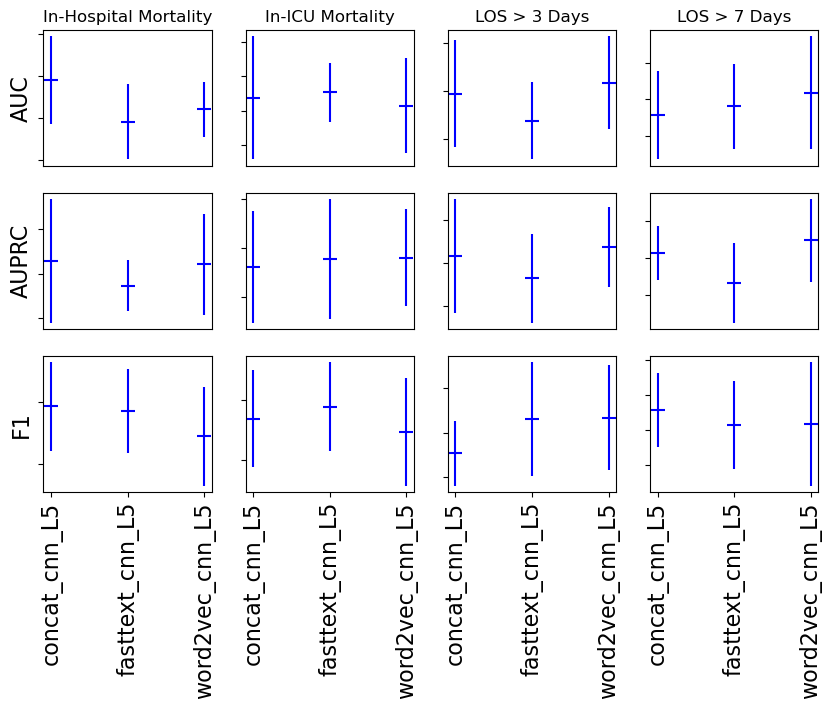

In [28]:
def create_plots(axs,
                 x_vals, 
                 mean, 
                 std,
                 row,
                 col):
    
    colors = {'word2vec': 'red', 
          'fasttext': 'red', 
          'concat': 'red',
          'blueBERT': 'blue', 
          'clinicalBERT': 'blue', 
          'concat_cnn_L5': 'blue', 
          'fasttext_cnn_L5': 'blue', 
          'word2vec_cnn_L5': 'blue'}
    
    axs[row, col].errorbar(x_vals, 
                            mean, 
                            std, 
                            fmt='o',   
                            color='none',
                            ecolor=x_vals.map(colors))
    axs[row, col].scatter(x_vals, 
                           mean,
                           marker='_', 
                           color=x_vals.map(colors), 
                           s=100)
    
    return axs

def update_ticks(axs, row, col, data, group, no_title):
    # Dynamically get the embedding names or any other categorization you have in your data
    names = data['embedding'].unique().tolist()  # Adjust this based on your actual column name or logic

    if not no_title:
        axs[row, col].set_title('{}'.format(group))

    # Remove y-tick labels
    axs[row, col].tick_params(axis='y', which='both', labelleft=False, labelright=False)

    # Only show x-ticks on the last subplot and rotate them 90 degrees
    if row == 2:
        axs[row, col].set_xticks(list(range(len(names))))
        axs[row, col].set_xticklabels(names, rotation=90, fontsize=16)  # Adapted to use the dynamic list of names
    else:
        axs[row, col].set_xticks([])
        
    return axs

        


# Create a plot with mean and standard deviation indicators for each group
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 6))

row, col = 0, 0

# Group the DataFrame by the 'Group' column
groups = df_all.groupby('task')

for i, (group, data) in enumerate(groups):
        
    x_vals = data['embedding']
    
    ## --------
    # AUC    
    ## --------
    
    mean = data['auc_mean'].values
    std = data['auc_std'].values
    
    axs = create_plots(axs, x_vals, mean, std, row, col)
    axs = update_ticks(axs, row, col, data, group, no_title=False)
    
    if col == 0:
        axs[row, col].set_ylabel('AUC', fontsize=16)
    
    row +=1
    
    ## --------
    # AUPRC    
    ## --------
    
    mean = data['auprc_mean'].values
    std = data['auprc_std'].values

    axs = create_plots(axs, x_vals, mean, std, row, col)
    axs = update_ticks(axs, row, col, data, group, no_title=True)
    
    if col == 0:
        axs[row, col].set_ylabel('AUPRC', fontsize=16)
    
    row +=1
    
    ## --------
    # F1    
    ## --------
    
    mean = data['F1_mean'].values
    std = data['F1_std'].values

    axs = create_plots(axs, x_vals, mean, std, row, col)
    axs = update_ticks(axs, row, col, data, group, no_title=True)
    
    if col == 0:
        axs[row, col].set_ylabel('F1', fontsize=16)
    
    row +=1
    
    # Ensure we move on to the right next plot
    if row > 2:
        row = 0
        col +=1
        
    
    if col > 3:
        col = 0

plt.savefig('images/ablation.png', bbox_inches='tight')

# Show the plot
plt.show()